# Intro

## Load

In [1]:
import os, sys, pickle
import numpy as np
from tqdm.notebook import trange, tqdm

In [2]:
from tesste import tesste
from ppp import ppp

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


In [19]:
import seaborn as sns
sns.set_theme()

# Data

In [6]:
chatgpt_folder='chatgpt_summaries/'

In [7]:
with open(chatgpt_folder+'chatgpt_shell_2015_text.pickle', 'rb') as f:
    chatgpt_shell_2015=pickle.load(f)

# Cosine similarity of the various examples

In [8]:
chatgpt_shell_2015.keys()

dict_keys(['Example1', 'Example2', 'Example3', 'Example4', 'Example5'])

In [14]:
keys=list(chatgpt_shell_2015.keys())
l_keys=len(keys)

In [16]:
pvals=np.zeros((l_keys,l_keys))
cos_sims=np.zeros((l_keys,l_keys))
for i in trange(l_keys):
    text_i=chatgpt_shell_2015[keys[i]]
    for j in trange(i+1, l_keys, leave=False):
        text_j=chatgpt_shell_2015[keys[j]]
        cacca=tesste(text_i, text_j)
        cos_sims[i, j]=cacca.cos_sim
        pvals[i, j]=cacca.pval

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<Axes: >

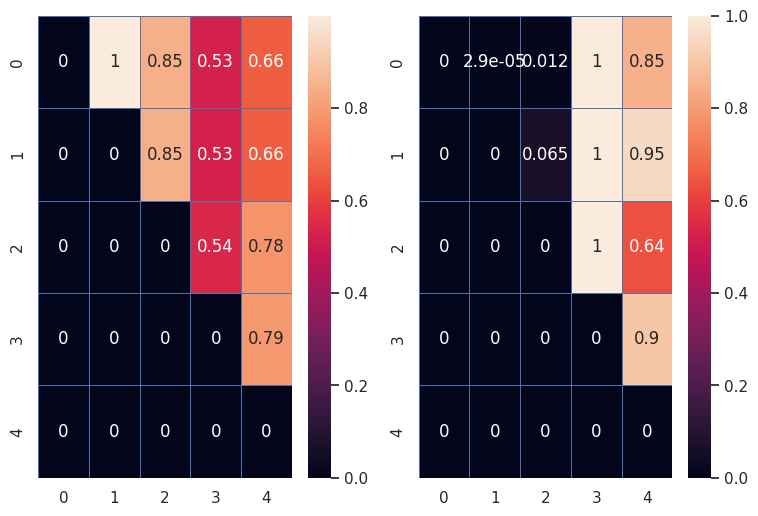

In [22]:
f, axs = plt.subplots(ncols=2, nrows=1, figsize=(9, 6))

sns.heatmap(cos_sims, annot=True, linewidths=.5, ax=axs[0], linecolor='b')
sns.heatmap(pvals, annot=True, linewidths=.5, ax=axs[1], linecolor='b')